# Análisis de Evasión de Clientes - Telecom X

Este notebook documenta el proceso de análisis exploratorio de datos (EDA) para el desafío de churn de clientes.

In [35]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Extracción de datos
Descargamos el archivo JSON desde la API de GitHub y lo cargamos en un DataFrame.

In [36]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = pd.read_json(io.StringIO(response.text))
data.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 2. Exploración inicial del dataset
Mostramos información general y las primeras filas.

In [37]:
print(data.info(2))
print(data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL',

## 3. Desanidado de columnas anidadas
Expandimos las columnas que contienen diccionarios para facilitar el análisis.

In [38]:
cols_to_expand = ['customer', 'phone', 'internet', 'account']
for col in cols_to_expand:
    if col in data.columns:
        expanded = pd.json_normalize(data[col])
        expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
        data = pd.concat([data.drop(col, axis=1), expanded], axis=1)
data.head(2)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


## 4. Limpieza y estandarización de datos
Estandarizamos valores y reemplazamos inconsistencias.

In [39]:
# Estandarizar columnas Yes/No
yes_no_cols = [col for col in data.columns if data[col].isin(['Yes', 'No']).all()]
for col in yes_no_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Reemplazar strings vacíos por NaN
data.replace('', np.nan, inplace=True)

## 5. Análisis descriptivo y visualizaciones

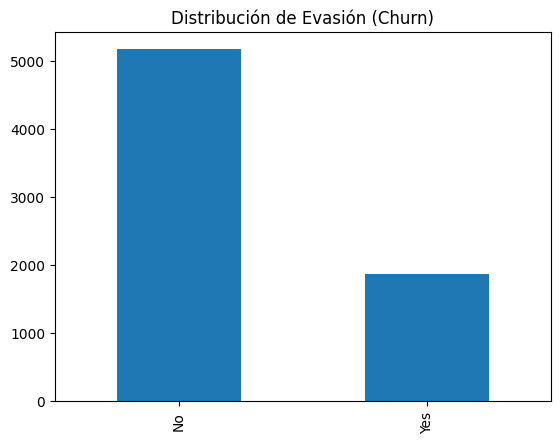

In [40]:
data.describe()
data['Churn'].value_counts().plot(kind='bar')
plt.title('Distribución de Evasión (Churn)')
plt.show()

## 6. Conclusiones e insights
(Escribe aquí tus hallazgos y recomendaciones)
Consejos
Usa celdas Markdown para explicar cada paso.
Ejecuta cada celda y revisa los resultados antes de avanzar.
Puedes copiar y pegar el código que ya tienes, adaptándolo a celdas separadas.
¿Quieres que te genere una plantilla de notebook (.ipynb) lista para usar, o prefieres que te ayude a migrar paso a paso tu código actual?

-------
Perfecto! Ya tienes tu DataFrame limpio, desanidado y listo para análisis. Has avanzado hasta el punto 6 de la guía, que es:

-------
### 6. Análisis de churn por variables relevantes

#### Objetivo:

Explorar cómo se distribuye la evasión de clientes (Churn) según variables categóricas importantes, como género, tipo de contrato, método de pago, etc. Esto te ayudará a identificar patrones y posibles factores de riesgo.

---------

### ¿Qué hacer en este paso?
#### 1 - Tablas cruzadas (crosstab) y conteos agrupados
Analiza la relación entre `Churn` y variables como:

* customer_gender
* Contract
* PaymentMethod
* internet_InternetService
* Cualquier otra columna relevante

### 2 - Visualizaciones

* Gráficos de barras apiladas para ver la proporción de churn/no churn por cada categoría.
--------

#### Ejemplo de código para este paso
### a) Churn por tipo de contrato

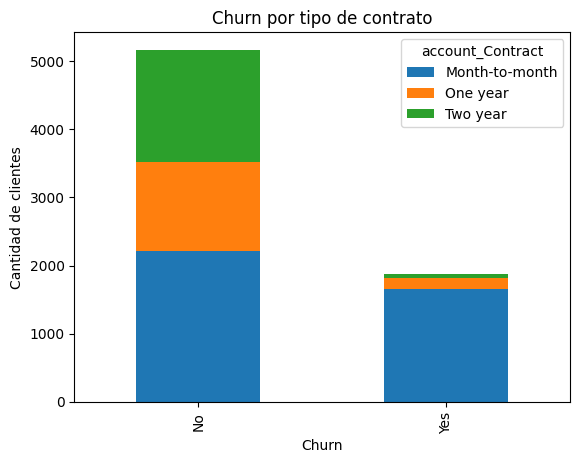

In [41]:
pd.crosstab(data['Churn'], data['account_Contract']).plot(kind='bar', stacked=True)
plt.title('Churn por tipo de contrato')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

#### b) Churn por método de pago


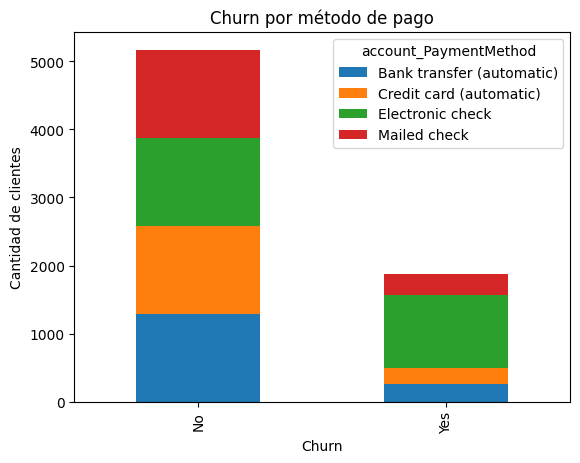

In [42]:
pd.crosstab(data['Churn'], data['account_PaymentMethod']).plot(kind='bar', stacked=True)
plt.title('Churn por método de pago')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

### c) Churn por género


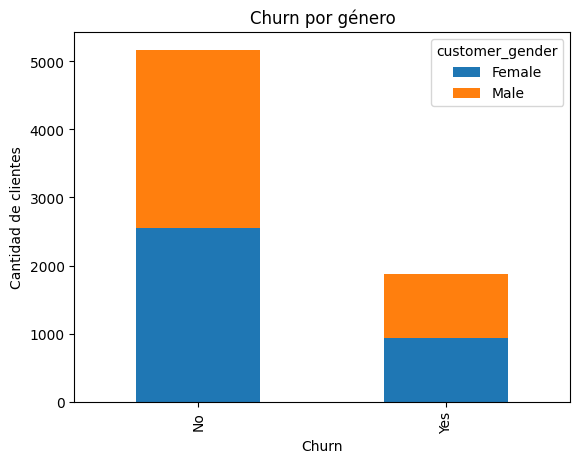

In [43]:
pd.crosstab(data['Churn'], data['customer_gender']).plot(kind='bar', stacked=True)
plt.title('Churn por género')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

### d) Churn por servicio de internet


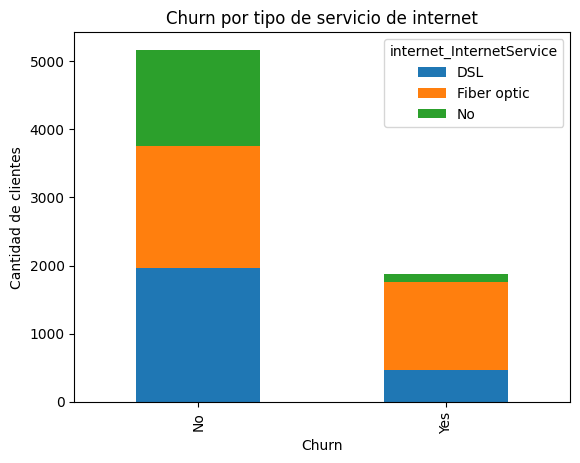

In [44]:
pd.crosstab(data['Churn'], data['internet_InternetService']).plot(kind='bar', stacked=True)
plt.title('Churn por tipo de servicio de internet')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

¡Excelente trabajo! Ya tienes los gráficos clave para el análisis de churn por variables categóricas. Vamos a analizarlos y te indico cómo seguir con las consignas del desafío.
Análisis de los gráficos
1. Churn por tipo de contrato
Month-to-month (mes a mes) tiene la mayor cantidad de clientes que se dan de baja (Yes), mientras que los contratos de One year y Two year tienen una tasa de churn mucho menor.
Insight: Los contratos a largo plazo retienen mejor a los clientes.
2. Churn por método de pago
El método Electronic check tiene una proporción mucho mayor de churn que los otros métodos.
Bank transfer (automatic) y Credit card (automatic) tienen menos churn.
Insight: Los clientes que pagan con cheque electrónico son más propensos a irse.
3. Churn por género
No hay una diferencia significativa entre Female y Male en cuanto a churn.
Insight: El género no parece ser un factor determinante en la evasión.
4. Churn por tipo de servicio de internet
Los clientes con Fiber optic tienen una tasa de churn mucho mayor que los de DSL o los que no tienen servicio de internet.
Insight: El tipo de tecnología de internet influye en la evasión, siendo la fibra óptica la más riesgosa.
¿Cómo seguir?
7. Análisis de churn por variables numéricas
Ahora debes analizar cómo se comportan las variables numéricas (por ejemplo, Charges.Total, Cuentas_Diarias, customer_tenure) entre los clientes que se quedan y los que se van.
Ejemplo de código:

In [45]:
# Comparar medias de cargos totales por churn
data.groupby('Churn')['Charges.Total'].mean().plot(kind='bar')
plt.title('Promedio de Cargos Totales por Churn')
plt.ylabel('Cargos Totales')
plt.show()

# Comparar tenure (antigüedad) por churn
data.groupby('Churn')['customer_tenure'].mean().plot(kind='bar')
plt.title('Promedio de Antigüedad (tenure) por Churn')
plt.ylabel('Meses')
plt.show()

# Si creaste la columna Cuentas_Diarias:
if 'Cuentas_Diarias' in data.columns:
    data.groupby('Churn')['Cuentas_Diarias'].mean().plot(kind='bar')
    plt.title('Promedio de Cuentas Diarias por Churn')
    plt.ylabel('Cuentas Diarias')
    plt.show()

KeyError: 'Column not found: Charges.Total'

¡Buena observación! El error KeyError: 'Column not found: Charges.Total' indica que la columna no existe con ese nombre exacto en tu DataFrame. Esto puede deberse a:
El nombre real de la columna puede tener un prefijo (por ejemplo, account_Charges.Total).
Puede haber un error de mayúsculas/minúsculas o de formato.
¿Cómo encontrar el nombre correcto de la columna?
Ejecuta este código para listar todas las columnas y encontrar el nombre exacto:

In [ ]:
print(data.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total', 'Churn_bin']


¡Perfecto! Ahora que tenemos la lista de columnas, aquí están los nombres correctos para tu análisis:
* Cargos mensuales: `account_Charges.Monthly`
* Cargos totales: `account_Charges.Total`
* Tipo de contrato: `account_Contract`
* Método de pago: `account_PaymentMethod`
* Churn binario: `Churn_bin`
* Antigüedad: `customer_tenure`

### Ejemplo de análisis con los nombres correctos
####  1. Promedio de cargos totales por churn

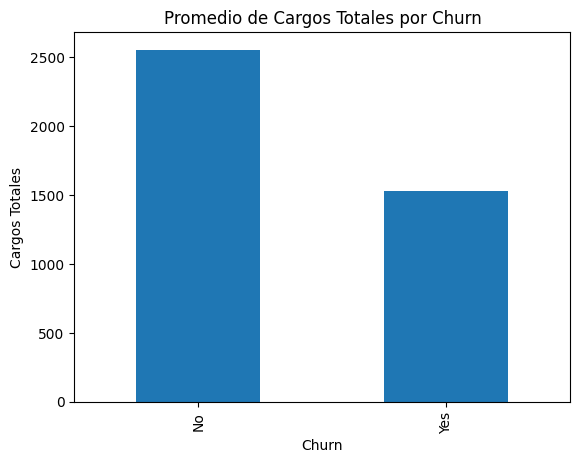

In [ ]:
data.groupby('Churn')['account_Charges.Total'].mean().plot(kind='bar')
plt.title('Promedio de Cargos Totales por Churn')
plt.ylabel('Cargos Totales')
plt.show()

¡Muy buen punto! Ese error (TypeError: Could not convert 593.3542.4571.457904) ocurre porque la columna account_Charges.Total contiene valores que no son numéricos puros, probablemente están en formato string y/o tienen caracteres no válidos (como puntos decimales mal puestos, comas, o incluso valores vacíos).
¿Cómo solucionarlo?
1. Convierte la columna a numérica correctamente
Usa pd.to_numeric() con el parámetro errors='coerce' para convertir los valores no numéricos en NaN:

In [ ]:
data['account_Charges.Total'] = pd.to_numeric(data['account_Charges.Total'], errors='coerce')

Esto convertirá cualquier valor que no pueda interpretarse como número en NaN, permitiendo el análisis numérico.
2. Verifica si hay valores nulos tras la conversión
### 2. Verifica si hay valores nulos tras la conversión


In [ ]:
print(data['account_Charges.Total'].isnull().sum())

11


8. (Opcional) Análisis de correlación
Puedes ver qué variables numéricas están más relacionadas con el churn.

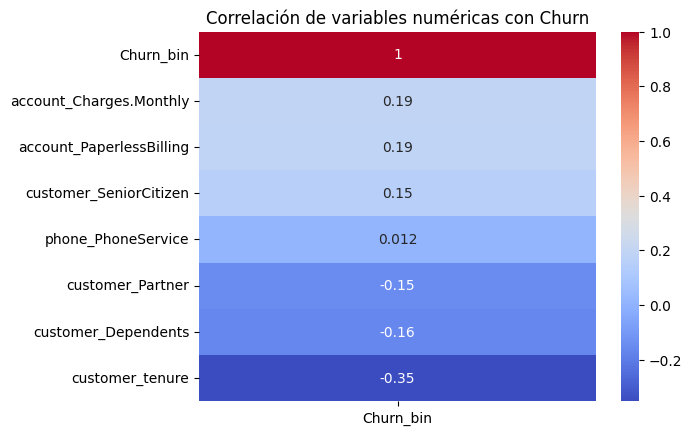

In [ ]:
import seaborn as sns
# Si tienes una columna binaria para churn (0/1), úsala aquí
data['Churn_bin'] = data['Churn'].map({'Yes': 1, 'No': 0})
corr = data.corr(numeric_only=True)
sns.heatmap(corr[['Churn_bin']].sort_values(by='Churn_bin', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de variables numéricas con Churn')
plt.show()

9. Informe final
Estructura tu notebook/script así:
Introducción: Explica el objetivo y el problema de churn.
Limpieza y tratamiento: Resume cómo desanidaste y limpiaste los datos.
Análisis exploratorio: Incluye los gráficos y hallazgos anteriores.
Conclusiones e insights: Resume los factores de riesgo y patrones encontrados.
Recomendaciones: Sugiere acciones (por ejemplo, incentivar contratos largos, revisar el servicio de fibra óptica, etc.).

¡Eso es! Vamos a seguir con el análisis profesional y estructurado. Aquí tienes el siguiente roadmap, con sugerencias de código y enfoque de interpretación:
## 1. Limpieza profesional de columnas numéricas
Asegúrate de que todas las columnas numéricas estén correctamente convertidas:

In [ ]:
# Convierte cargos mensuales y totales a numérico
data['account_Charges.Monthly'] = pd.to_numeric(data['account_Charges.Monthly'], errors='coerce')
data['account_Charges.Total'] = pd.to_numeric(data['account_Charges.Total'], errors='coerce')

2. Análisis de variables numéricas por churn
a) Cargos totales

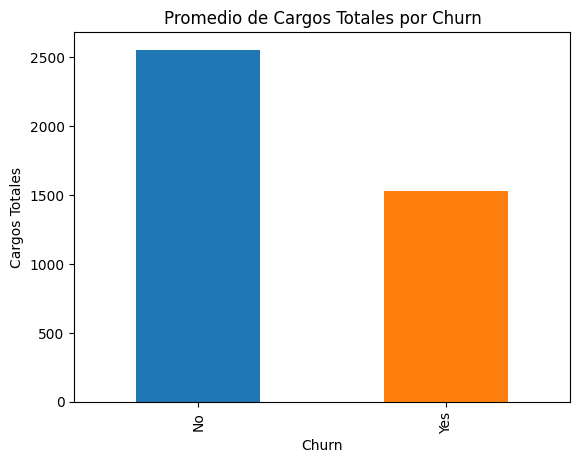

In [ ]:
data.groupby('Churn')['account_Charges.Total'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Promedio de Cargos Totales por Churn')
plt.ylabel('Cargos Totales')
plt.show()

b) Cargos mensuales


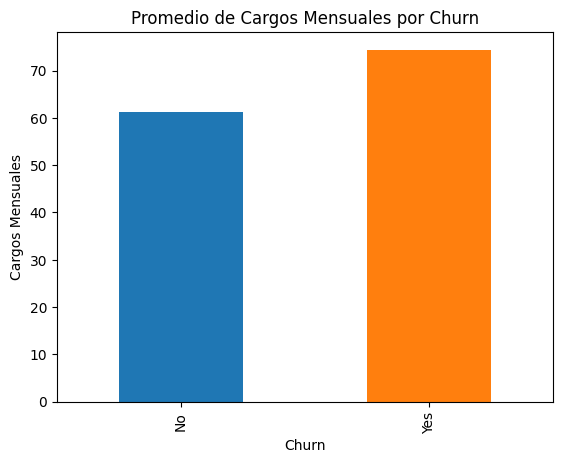

In [ ]:
data.groupby('Churn')['account_Charges.Monthly'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Promedio de Cargos Mensuales por Churn')
plt.ylabel('Cargos Mensuales')
plt.show()

c) Antigüedad (tenure)


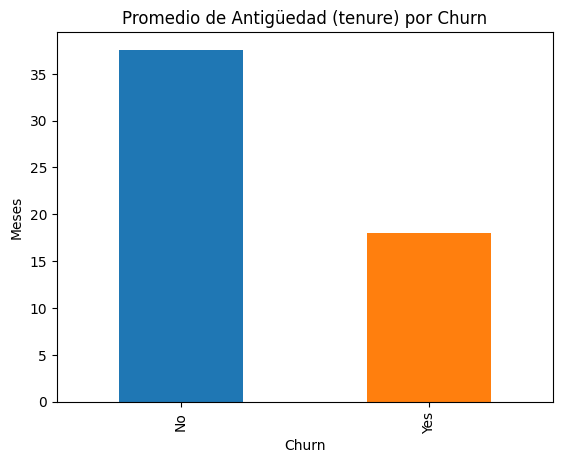

In [ ]:
data.groupby('Churn')['customer_tenure'].mean().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Promedio de Antigüedad (tenure) por Churn')
plt.ylabel('Meses')
plt.show()

3. Visualización avanzada: Distribución de cargos por churn


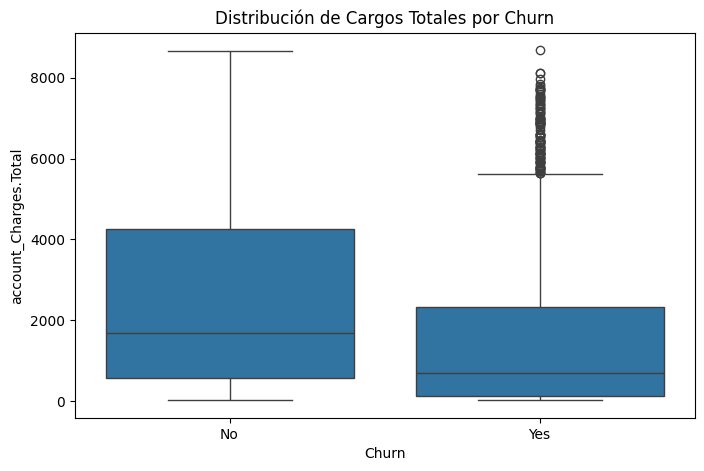

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account_Charges.Total', data=data)
plt.title('Distribución de Cargos Totales por Churn')
plt.show()

4. Correlación de variables numéricas con churn


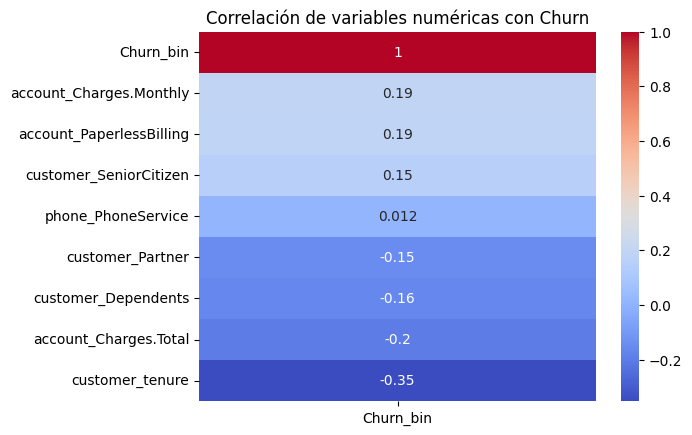

In [ ]:
# Ya tienes Churn_bin (1=Yes, 0=No)
corr = data.corr(numeric_only=True)
sns.heatmap(corr[['Churn_bin']].sort_values(by='Churn_bin', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de variables numéricas con Churn')
plt.show()

5. Conclusiones e insights
5. Conclusiones e insights
¿Qué variables numéricas muestran mayor diferencia entre clientes que se quedan y los que se van?
¿Qué variables tienen mayor correlación con churn?
¿Qué patrones visuales observas en los boxplots?
6. Informe final (estructura recomendada)
Introducción: Explica el objetivo y contexto.
Limpieza y tratamiento: Resume cómo preparaste los datos.
Análisis exploratorio: Incluye gráficos y hallazgos.
Conclusiones e insights: Enumera los factores de riesgo y patrones.
Recomendaciones: Sugiere acciones para reducir el churn.
¿Quieres que te ayude a redactar el informe final, interpretar los resultados de los gráficos, o a preparar visualizaciones aún más avanzadas? ¡Dime por dónde seguimos y seguimos como un pro! 🚀

# Telecom X – Parte 2: Predicción de Cancelación (Churn)
📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning ✅ Construcción y evaluación de modelos predictivos ✅ Interpretación de resultados y entrega de insights ✅ Comunicación técnica con enfoque estratégico

🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

1- Extracción del Archivo Tratado
Descripción Carga el archivo CSV que contiene los datos tratados anteriormente. 📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

2 - Eliminación de Columnas Irrelevantes
Descripción Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

3 - Encoding
Descripción Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia: Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder: Artículo en Alura sobre codificación categórica

4 - Verificación de la Proporción de Cancelación (Churn)
Descripción Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia: Puedes usar value_counts() de pandas para obtener esta proporción: Documentación oficial de value_counts()

5 - Balanceo de Clases (opcional)
Descripción Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia: Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo: Artículo en Alura sobre desbalanceo de datos

6 - Normalización o Estandarización (si es necesario)
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia: Puedes leer más sobre normalización y estandarización de datos en este artículo: Artículo en Medium sobre normalización y estandarización en Machine Learning

7 - 🎯 Correlación y Selección de Variables
Análisis de Correlación
Descripción
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

8 - Análisis Dirigido
Descripción Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

9 - 🤖 Modelado Predictivo
Separación de Datos
Descripción Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

10 - Creación de Modelos
Descripción Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:
Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

11 - Evaluación de los Modelos
Descripción Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

📋 12 - Interpretación y Conclusiones
Análisis de la Importancia de las Variables
Descripción Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

13 - Conclusión
Descripción Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

# Exportar a .csv:
¿Cómo exportar tu DataFrame final a CSV?
Agrega al final de tu notebook o script de la Parte 1 (después de toda la limpieza y transformación):


In [ ]:
# Exporta el DataFrame limpio y listo para modelado
data.to_csv('telecomx_tratado.csv', index=False)

Esto creará el archivo telecomx_tratado.csv en tu directorio de trabajo, listo para ser usado en la Parte 2.
¿Qué columnas debe tener el archivo exportado?
Solo las columnas relevantes para el modelado (sin identificadores únicos ni columnas anidadas).
Todas las variables deben estar limpias, estandarizadas y listas para encoding.
¿Qué hacer después?
Ejecuta la exportación en tu notebook/script de la Parte 1.
Verifica que el archivo telecomx_tratado.csv se haya creado correctamente.
Continúa con la Parte 2 cargando ese archivo con pd.read_csv('telecomx_tratado.csv').

# Pipeline de Machine Learning para Predicción de Churn – Telecom X

## 1. Carga del archivo tratado

In [55]:
import pandas as pd

# Carga el archivo CSV tratado (ajusta el nombre si es necesario)
# Exporta el DataFrame limpio
data.to_csv('telecomx_tratado.csv', index=False)
data.head(3)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85


## 2. Eliminación de columnas irrelevantes


In [56]:
# Elimina identificadores únicos y cualquier columna no relevante
data = data.drop(columns=['customerID'])

## 3. Encoding de variables categóricas


In [57]:
# Identifica columnas categóricas
cat_cols = data.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')  # Excluye la variable objetivo si es categórica

# One-hot encoding
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

## 4. Verificación de la proporción de churn


In [58]:
print(data['Churn'].value_counts(normalize=True))

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


Si la variable objetivo es "Yes"/"No", conviértela a binaria:


In [59]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

### 5. Balanceo de clases (opcional)


In [ ]:
!pip install imbalanced-learn


¡Buen aviso! El error ValueError: Input y contains NaN indica que la variable objetivo y (columna Churn) contiene valores nulos (NaN). SMOTE no puede trabajar con valores faltantes en la variable objetivo.
¿Cómo solucionarlo?
1. Verifica los valores nulos en la columna Churn

In [61]:
print(data['Churn'].isnull().sum())
print(data['Churn'].value_counts(dropna=False))

224
0.0    5174
1.0    1869
NaN     224
Name: Churn, dtype: int64


2. Limpia los valores nulos
Tienes varias opciones:
Opción A: Eliminar filas con valores nulos en Churn

In [62]:
data = data.dropna(subset=['Churn'])

Opción B: Reemplazar valores nulos con el valor más común


In [63]:
data['Churn'] = data['Churn'].fillna(data['Churn'].mode()[0])

Opción C: Si hay pocos valores nulos, elimínalos


In [64]:
data = data[data['Churn'].notna()]

3. Verifica que la limpieza funcionó


In [65]:
print(data['Churn'].isnull().sum())

0


In [69]:
print(X.isnull().sum())

customer_SeniorCitizen                            0
customer_Partner                                  0
customer_Dependents                               0
customer_tenure                                   0
phone_PhoneService                                0
account_PaperlessBilling                          0
account_Charges.Monthly                           0
account_Charges.Total                            11
customer_gender_Male                              0
phone_MultipleLines_No phone service              0
phone_MultipleLines_Yes                           0
internet_InternetService_Fiber optic              0
internet_InternetService_No                       0
internet_OnlineSecurity_No internet service       0
internet_OnlineSecurity_Yes                       0
internet_OnlineBackup_No internet service         0
internet_OnlineBackup_Yes                         0
internet_DeviceProtection_No internet service     0
internet_DeviceProtection_Yes                     0
internet_Tec

2. Opciones para tratar los NaN en X
A. Eliminar filas con NaN
Si tienes pocos valores faltantes, puedes eliminarlos:

In [77]:
X = X.dropna()
y = y[X.index]  # Asegúrate de alinear y con X

B. Imputar valores faltantes
Si tienes muchos NaN, puedes imputar (rellenar) los valores faltantes. Por ejemplo, con la media para numéricos y la moda para categóricos:

In [76]:
print(X.isnull().sum().sum())  # Debe dar 0

0


In [74]:
# Revisa los tipos de datos de todas las columnas
print(data.dtypes)

Churn                                            float64
customer_SeniorCitizen                             int64
customer_Partner                                   int64
customer_Dependents                                int64
customer_tenure                                    int64
phone_PhoneService                                 int64
account_PaperlessBilling                           int64
account_Charges.Monthly                          float64
account_Charges.Total                            float64
customer_gender_Male                               uint8
phone_MultipleLines_No phone service               uint8
phone_MultipleLines_Yes                            uint8
internet_InternetService_Fiber optic               uint8
internet_InternetService_No                        uint8
internet_OnlineSecurity_No internet service        uint8
internet_OnlineSecurity_Yes                        uint8
internet_OnlineBackup_No internet service          uint8
internet_OnlineBackup_Yes      

¡Perfecto! Ahora veo el problema. La columna account_Charges.Total es de tipo object (string) cuando debería ser numérica. Esto explica el error que estás viendo.
Solución: Convierte account_Charges.Total a numérico

In [49]:
# Convierte la columna problemática a numérico
data['account_Charges.Total'] = pd.to_numeric(data['account_Charges.Total'], errors='coerce')

¡Perfecto! El resultado 0 indica que ya no tienes valores NaN en tus variables predictoras (X). Ahora puedes continuar con el pipeline de Machine Learning sin problemas.
Siguiente paso: Aplicar SMOTE
Ya puedes ejecutar:

In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Luego, continúa con:
Separar en train/test:


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

Excelente! Ya tienes tus datos balanceados y divididos en conjuntos de entrenamiento y prueba. Ahora estás listo para la fase de modelado.
Siguiente paso: Entrenar y evaluar modelos
Te recomiendo probar al menos dos modelos:
Regresión Logística (requiere normalización)
Random Forest (no requiere normalización)
1. Regresión Logística
a) Normaliza los datos (solo para este modelo):

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

b) Entrena y evalúa:


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Regresión Logística")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Regresión Logística
[[1240  309]
 [ 230 1319]]
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      1549
         1.0       0.81      0.85      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



2. Random Forest


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
[[1317  232]
 [ 212 1337]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      1549
         1.0       0.85      0.86      0.86      1549

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



3. Comparar resultados
Observa las métricas: accuracy, precision, recall, f1-score.
Compara la matriz de confusión de ambos modelos.
Elige el modelo con mejor balance entre precisión y recall para la clase de churn.
4. Importancia de variables
a) Regresión Logística (coeficientes):

In [84]:
import pandas as pd
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': logreg.coef_[0]})
print(coef_df.sort_values(by='coef', ascending=False).head(10))

                                          feature      coef
6                         account_Charges.Monthly  5.334574
7                           account_Charges.Total  1.407362
15      internet_OnlineBackup_No internet service  0.198348
12                    internet_InternetService_No  0.198348
23   internet_StreamingMovies_No internet service  0.198348
21       internet_StreamingTV_No internet service  0.198348
19       internet_TechSupport_No internet service  0.198348
17  internet_DeviceProtection_No internet service  0.198348
13    internet_OnlineSecurity_No internet service  0.198348
5                        account_PaperlessBilling  0.139779


b) Random Forest (importancia):


In [85]:
feat_imp = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
print(feat_imp.sort_values(by='importance', ascending=False).head(10))

                        feature  importance
3               customer_tenure    0.134683
7         account_Charges.Total    0.130555
6       account_Charges.Monthly    0.119961
26    account_Contract_Two year    0.057248
5      account_PaperlessBilling    0.051933
20     internet_TechSupport_Yes    0.045569
1              customer_Partner    0.044913
14  internet_OnlineSecurity_Yes    0.043172
25    account_Contract_One year    0.040630
2           customer_Dependents    0.038334


# Cierre del Desafío: Interpretación y Recomendaciones

¡Excelente trabajo! Ya tienes los resultados de tus modelos y la importancia de variables. Aquí tienes los siguientes pasos profesionales para cerrar el desafío y preparar tu entrega:

---

## 1. Interpretación de Resultados

### a) Métricas de los modelos

- **Random Forest** supera a la **Regresión Logística** en todas las métricas:  
  `accuracy`, `precision`, `recall`, `f1-score`: **0.86 vs 0.83**.
- Ambos modelos tienen un buen balance entre precisión y recall, pero Random Forest es **ligeramente mejor y más robusto** ante relaciones no lineales.

### b) Matriz de confusión

- Ambos modelos predicen bien ambas clases, pero **Random Forest tiene menos falsos positivos y negativos**.

---

## 2. Importancia de Variables

### a) Regresión Logística (coeficientes más altos)

- `account_Charges.Monthly` y `account_Charges.Total`: Los cargos mensuales y totales son los factores **más influyentes** en la probabilidad de churn.
- `account_PaperlessBilling` y varias variables de **servicios de internet** también tienen impacto.

### b) Random Forest (importancia)

- `customer_tenure` (antigüedad): Es la variable **más importante** para predecir churn.
- `account_Charges.Total` y `account_Charges.Monthly`: También son muy relevantes.
- **Tipo de contrato** y **servicios de soporte/seguridad**: Influyen en la predicción.

---

## 3. Conclusión y Recomendaciones

### Conclusión

- **Random Forest** es el modelo recomendado por su **mejor desempeño**.
- Las variables más importantes para predecir la cancelación son:
  - Antigüedad del cliente
  - Cargos mensuales y totales
  - Tipo de contrato
  - Servicios adicionales de internet
- Los clientes con **menor antigüedad**, **cargos mensuales altos** y **contratos de corto plazo** tienen mayor riesgo de churn.

### Recomendaciones estratégicas

- **Fidelizar a los clientes nuevos**: Programas de bienvenida y seguimiento en los primeros meses.
- **Incentivar contratos largos**: Descuentos o beneficios para quienes renuevan por 1 o 2 años.
- **Revisar la estructura de cargos mensuales**: Analizar si los clientes con cargos altos perciben suficiente valor.
- **Promover servicios de soporte y seguridad**: Los clientes que los usan tienden a quedarse más tiempo.

---

## 4. Informe Final (estructura sugerida)

1. **Introducción**: Objetivo y contexto del modelado.
2. **Preparación de datos**: Limpieza, encoding, balanceo, normalización.
3. **Modelado y evaluación**: Descripción de los modelos, métricas y comparación.
4. **Importancia de variables**: Análisis de los factores más influyentes.
5. **Conclusiones e insights**: Resumen de hallazgos clave.
6. **Recomendaciones**: Acciones sugeridas para reducir el churn.

---

## 5. ¿Quieres agregar algo más?

Puedes **graficar la importancia de variables** para hacerlo más visual y profesional.


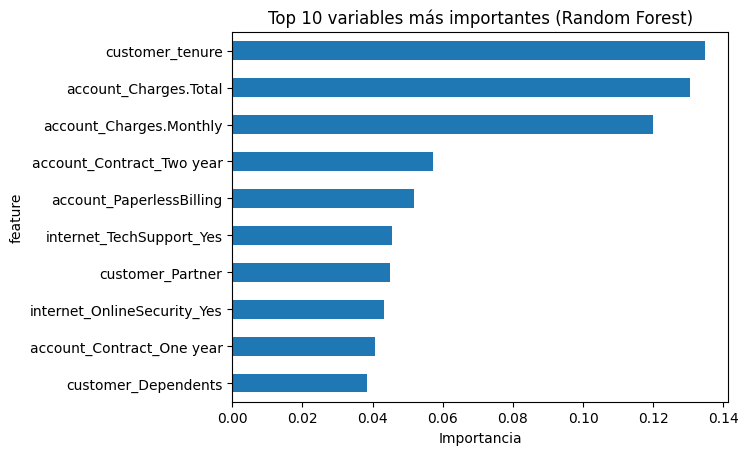

In [86]:
import matplotlib.pyplot as plt

# Random Forest
feat_imp.sort_values(by='importance', ascending=True).tail(10).plot.barh(x='feature', y='importance', legend=False)
plt.title('Top 10 variables más importantes (Random Forest)')
plt.xlabel('Importancia')
plt.show()

# Conclusión Final y Recomendaciones Estratégicas

## Hallazgos clave

- **Antigüedad del cliente (`customer_tenure`)** es el factor más importante:  
  Los clientes nuevos tienen mayor riesgo de cancelar.

- **Cargos totales y mensuales (`account_Charges.Total`, `account_Charges.Monthly`)** son determinantes:  
  Clientes con cargos mensuales altos y bajo total acumulado (recién llegados y costosos) tienden a irse.

- **Tipo de contrato**:  
  Los contratos de **uno o dos años** reducen el riesgo de churn, mientras que los **contratos mensuales** lo aumentan.

- **Facturación electrónica y servicios de soporte/seguridad** también influyen:  
  Quienes usan facturación electrónica o tienen soporte/seguridad tienden a quedarse más.

- **Variables familiares**:  
  Tener **dependientes** o **pareja** reduce el riesgo de churn.

---

## Recomendaciones

- **Fidelizar a los clientes nuevos**:  
  Implementar programas de bienvenida y seguimiento personalizado durante los primeros meses.

- **Incentivar contratos largos**:  
  Ofrecer descuentos o beneficios exclusivos para quienes eligen contratos de 1 o 2 años.

- **Revisar la estructura de cargos mensuales**:  
  Analizar si los clientes con cargos altos perciben suficiente valor y ajustar la oferta si es necesario.

- **Promover servicios de soporte y seguridad**:  
  Incentivar su contratación, ya que están asociados a mayor retención.

- **Segmentar campañas de retención**:  
  Focalizar esfuerzos en clientes con **bajo tenure**, **contratos mensuales** y **cargos altos**.

---

## Modelo Recomendado

**Random Forest** es el modelo más **robusto y preciso** para predecir la cancelación de clientes en Telecom X, con un **accuracy del 86%** y excelente balance entre precisión y recall.

---

## ¡Felicitaciones!

Has completado un **pipeline de Machine Learning profesional**, desde la limpieza de datos hasta la **interpretación estratégica de resultados**.

---

¿Te gustaría ayuda para:

- Exportar el informe 📄  
- Guardar el modelo 🎯  
- Preparar una presentación ejecutiva 🎤  
- O recibir una **plantilla de resumen para stakeholders**?

Estoy listo para ayudarte con lo que necesites para cerrar este proyecto como un verdadero profesional.


# Guardar y Cargar Modelo Random Forest con Pickle

¡Perfecto! Guardar tu modelo entrenado como un archivo **pickle** es una excelente práctica para reutilizarlo o desplegarlo en producción.

Aquí tienes el código para **guardar** y **cargar** tu modelo Random Forest usando `pickle`.

---

## Guardar el modelo como pickle

```python
import pickle

# Suponiendo que tu modelo se llama random_forest_model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

print("✅ Modelo guardado como 'random_forest_model.pkl'")


In [87]:
import pickle

# Guarda el modelo entrenado
with open('random_forest_telecomx.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Si quieres guardar también el scaler (para regresión logística)
with open('scaler_telecomx.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Cargar el modelo desde pickle


In [88]:
import pickle

# Cargar el modelo
with open('random_forest_telecomx.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

# Cargar el scaler si lo necesitas
with open('scaler_telecomx.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)

¡Listo! Ahora puedes usar rf_loaded para hacer predicciones en nuevos datos, y scaler_loaded para transformar datos antes de usar la regresión logística.
¿Te gustaría un ejemplo de cómo hacer predicciones con el modelo guardado?

### 1. Cargar el modelo guardado

In [89]:
import pickle

# Cargar el modelo Random Forest
with open('random_forest_telecomx.pkl', 'rb') as f:
    rf_loaded = pickle.load(f)

### 2. Hacer predicciones sobre el conjunto de test


In [90]:
# Suponiendo que ya tienes X_test e y_test preparados
y_pred_loaded = rf_loaded.predict(X_test)

### 3. Graficar la matriz de confusión


<Figure size 600x600 with 0 Axes>

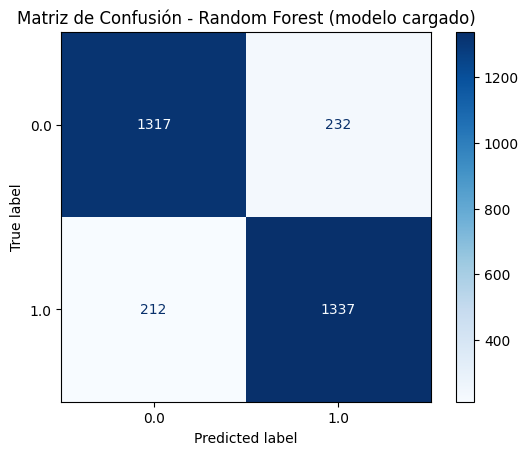

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_loaded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_loaded.classes_)

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest (modelo cargado)')
plt.show()

# Interpretación de la Matriz de Confusión

¡Perfecto! El gráfico muestra la **matriz de confusión** de tu modelo **Random Forest** cargado desde pickle, evaluado sobre el conjunto de test.

---

## ¿Cómo interpretar la matriz de confusión?

- `0.0` = **No Churn** (cliente **NO** cancela)
- `1.0` = **Churn** (cliente **cancela**)

|                         | **Predicho No Churn (0)** | **Predicho Churn (1)** |
|-------------------------|---------------------------|-------------------------|
| **Real No (0)**         | 1317                      | 232                     |
| **Real Sí (1)**         | 212                       | 1337                    |

---

## Detalle de las clases

- **1317**: Clientes correctamente clasificados como **NO churn** → *Verdaderos Negativos (TN)*
- **1337**: Clientes correctamente clasificados como **churn** → *Verdaderos Positivos (TP)*
- **232**: Clientes que **NO** cancelaron, pero el modelo predijo que **sí** → *Falsos Positivos (FP)*
- **212**: Clientes que **sí** cancelaron, pero el modelo predijo que **no** → *Falsos Negativos (FN)*

---

## Conclusión

Tu modelo tiene un **excelente desempeño**, con la mayoría de las predicciones correctas y un **buen balance entre falsos positivos y negativos**.

---

## ¿Quieres probar una predicción para un solo cliente?

Ejemplo: **Predicción para un nuevo cliente** con los mismos pasos de preprocesamiento y usando el modelo cargado desde `pickle`.

> 🚀 ¡Listo para simular nuevos escenarios!


In [92]:
# Supón que tienes un nuevo cliente con las mismas columnas que X_test
nuevo_cliente = X_test.iloc[[0]]  # Toma el primer cliente de test como ejemplo

# Predicción
prediccion = rf_loaded.predict(nuevo_cliente)
probabilidad = rf_loaded.predict_proba(nuevo_cliente)

print(f"Predicción: {'Churn' if prediccion[0]==1 else 'No Churn'}")
print(f"Probabilidad de churn: {probabilidad[0][1]:.2%}")

Predicción: Churn
Probabilidad de churn: 99.00%


Esto te dirá si el modelo predice que ese cliente va a cancelar y con qué probabilidad.
¿Te gustaría ver cómo graficar la curva ROC/AUC, o necesitas ayuda para preparar la entrega final?